In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os

In [90]:
parent_dir = os.path.abspath(os.path.join('','..'))
path = os.path.join(parent_dir, 'data/features/')
path_features_clear = os.path.join(path, 'features_clear.csv')
path_features_obfuscated = os.path.join(path, 'features_obfuscated.csv')
    
df_clear = pd.read_csv(path_features_clear, index_col=0)
df_obfuscated = pd.read_csv(path_features_obfuscated, index_col=0)


In [91]:
df_clear.describe()

,script_len,char_per_line,if_freq,false_freq,true_freq,whitesp_freq,lines_100,return_freq,var_freq,this_freq,toString_freq,eval_freq,comment_amount,words_count,vowel_freq,non_read_freq,scr_entropy,str_enc_freq
count,1.608000e+03,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000
mean,1.483499e+05,53.778866,0.014325,0.001436,0.001711,0.370478,0.001596,0.018925,0.020002,0.000638,0.000715,0.000082,18.558458,14411.365050,0.153406,0.573716,4.199897,0.000167
std,3.729749e+05,121.678605,0.011935,0.009477,0.012248,0.113426,0.026566,0.012922,0.013593,0.001960,0.001257,0.000329,122.392837,36401.443496,0.036319,0.095420,0.476842,0.002414
min,1.900000e+01,12.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.015702,0.200000,2.092727,0.000000
25%,6.338250e+03,37.894097,0.006717,0.000000,0.000000,0.312585,0.000000,0.008635,0.013423,0.000000,0.000000,0.000000,0.000000,630.750000,0.130566,0.520930,3.914829,0.000000
50%,2.355350e+04,44.909259,0.012121,0.000000,0.000039,0.381158,0.000000,0.018906,0.018387,0.000085,0.000157,0.000000,1.000000,2311.000000,0.149483,0.588523,4.215300,0.000000
75%,1.353922e+05,51.323009,0.018001,0.000296,0.000561,0.440029,0.000000,0.027079,0.024957,0.000567,0.000956,0.000000,3.000000,13146.000000,0.173965,0.635249,4.500672,0.000003
max,4.225544e+06,3893.566667,0.083333,0.333333,0.333333,0.740985,1.000000,0.062500,0.333333,0.025000,0.014941,0.004045,2143.000000,470643.000000,0.320000,0.918163,5.772775,0.061701


In [92]:
tsne = TSNE(perplexity=40, random_state=0)
embs_clear = tsne.fit_transform(df_clear)
embs_obfuscated = tsne.fit_transform(df_obfuscated)

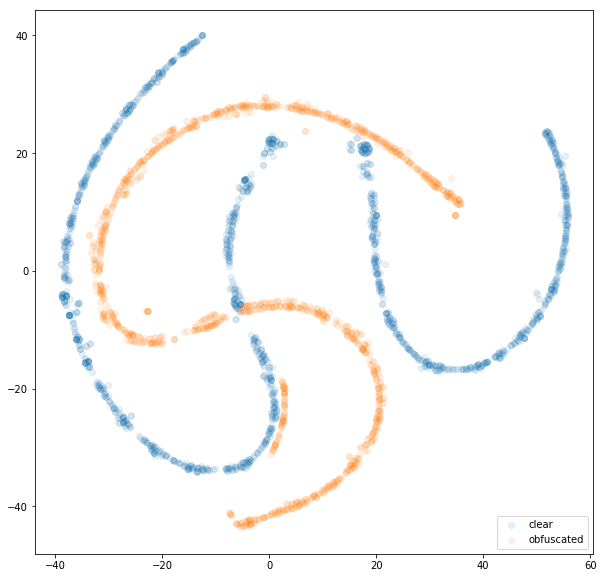

In [93]:
plot_data = (embs_clear, embs_obfuscated)
FS = (10, 10)
groups = ["clear", "obfuscated"]
fig, ax = plt.subplots(figsize=FS)

ax.scatter(embs_clear[:, 0], embs_clear[:, 1], alpha=.1, label=groups[0])
ax.scatter(embs_obfuscated[:, 0], embs_obfuscated[:, 1], alpha=.1, label=groups[1])
ax.legend(loc=4)